# 23-% Long Goalkicks

## Trying to find out percentage of goalkicks which are punted out long and high out in the Prem

## Data from Fbref

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np


from PIL import Image
import urllib
import json
import os
from PIL import Image
import urllib
import os

#### Data Preprocessing

In [2]:
# Read CSV as DataFrame called airline_bumping
liga = pd.read_csv("/Users/ligandrosy/Downloads/GK.csv")
liga

,Squad,Att,Launch%,AvgLen▼
0,Arsenal,39,74.4,61.9
1,Newcastle Utd,43,72.1,57.6
2,Southampton,56,75.0,57.4
3,Everton,82,70.7,56.2
4,Manchester Utd,73,75.3,55.8
5,Brentford,67,70.1,55.1
6,Brighton,66,59.1,50.7
7,Nott'ham Forest,79,62.0,49.5
8,West Ham,73,67.1,49.1
9,Fulham,64,57.8,49.1


In [3]:
codes = { "Liverpool" :8650,  "Manchester City" :  8456,"Arsenal" :9825, "Tottenham" :  8586, "Brighton" :10204,
                      "Leeds United" :8463,
                     "Chelsea" :8455,
                  "Brentford" :9937,
           "Newcastle Utd" :10261,
                     "Fulham" :9879, "Crystal Palace" :9826,
          "Manchester Utd" :10260,
                     "Everton" :8668,
                 "Southampton":8466,
                 "Aston Villa" :10252,
          "Nott'ham Forest":10203,
   "Wolves":8602,
                    "West Ham" :8654,
                   "Leicester City" : 8197,
               "Bournemouth" :8678}

In [96]:
liga = liga.sort_values(by = "Launch%", ascending = True)
clubs = []
for x in (liga["Squad"]):
    if x in codes:
        clubs.append(codes[x])

In [97]:
liga["code"] = clubs

In [98]:
liga

,Squad,Att,Launch%,AvgLen▼,code
18,Manchester City,36,16.7,28.9,8456
19,Tottenham,80,26.3,27.8,8586
16,Wolves,68,36.8,36.5,8602
17,Liverpool,35,37.1,33.5,8650
14,Aston Villa,58,43.1,40.8,10252
15,Chelsea,45,46.7,39.0,8455
13,Leeds United,62,50.0,43.3,8463
11,Leicester City,49,51.0,44.0,8197
10,Bournemouth,87,54.0,44.0,8678
12,Crystal Palace,74,56.8,43.4,9826


### Adding Logo

In [71]:
import matplotlib.image as image

In [118]:
im1 = plt.imread('/Users/ligandrosy/Downloads/PREM.png')

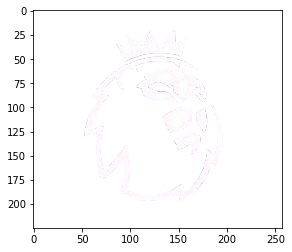

In [119]:
plt.imshow(im1)

/var/folders/y9/7jjg2kks2396zw687mh2t7vc0000gn/T/ipykernel_2818/603258652.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels([x for x in range(100,120)])


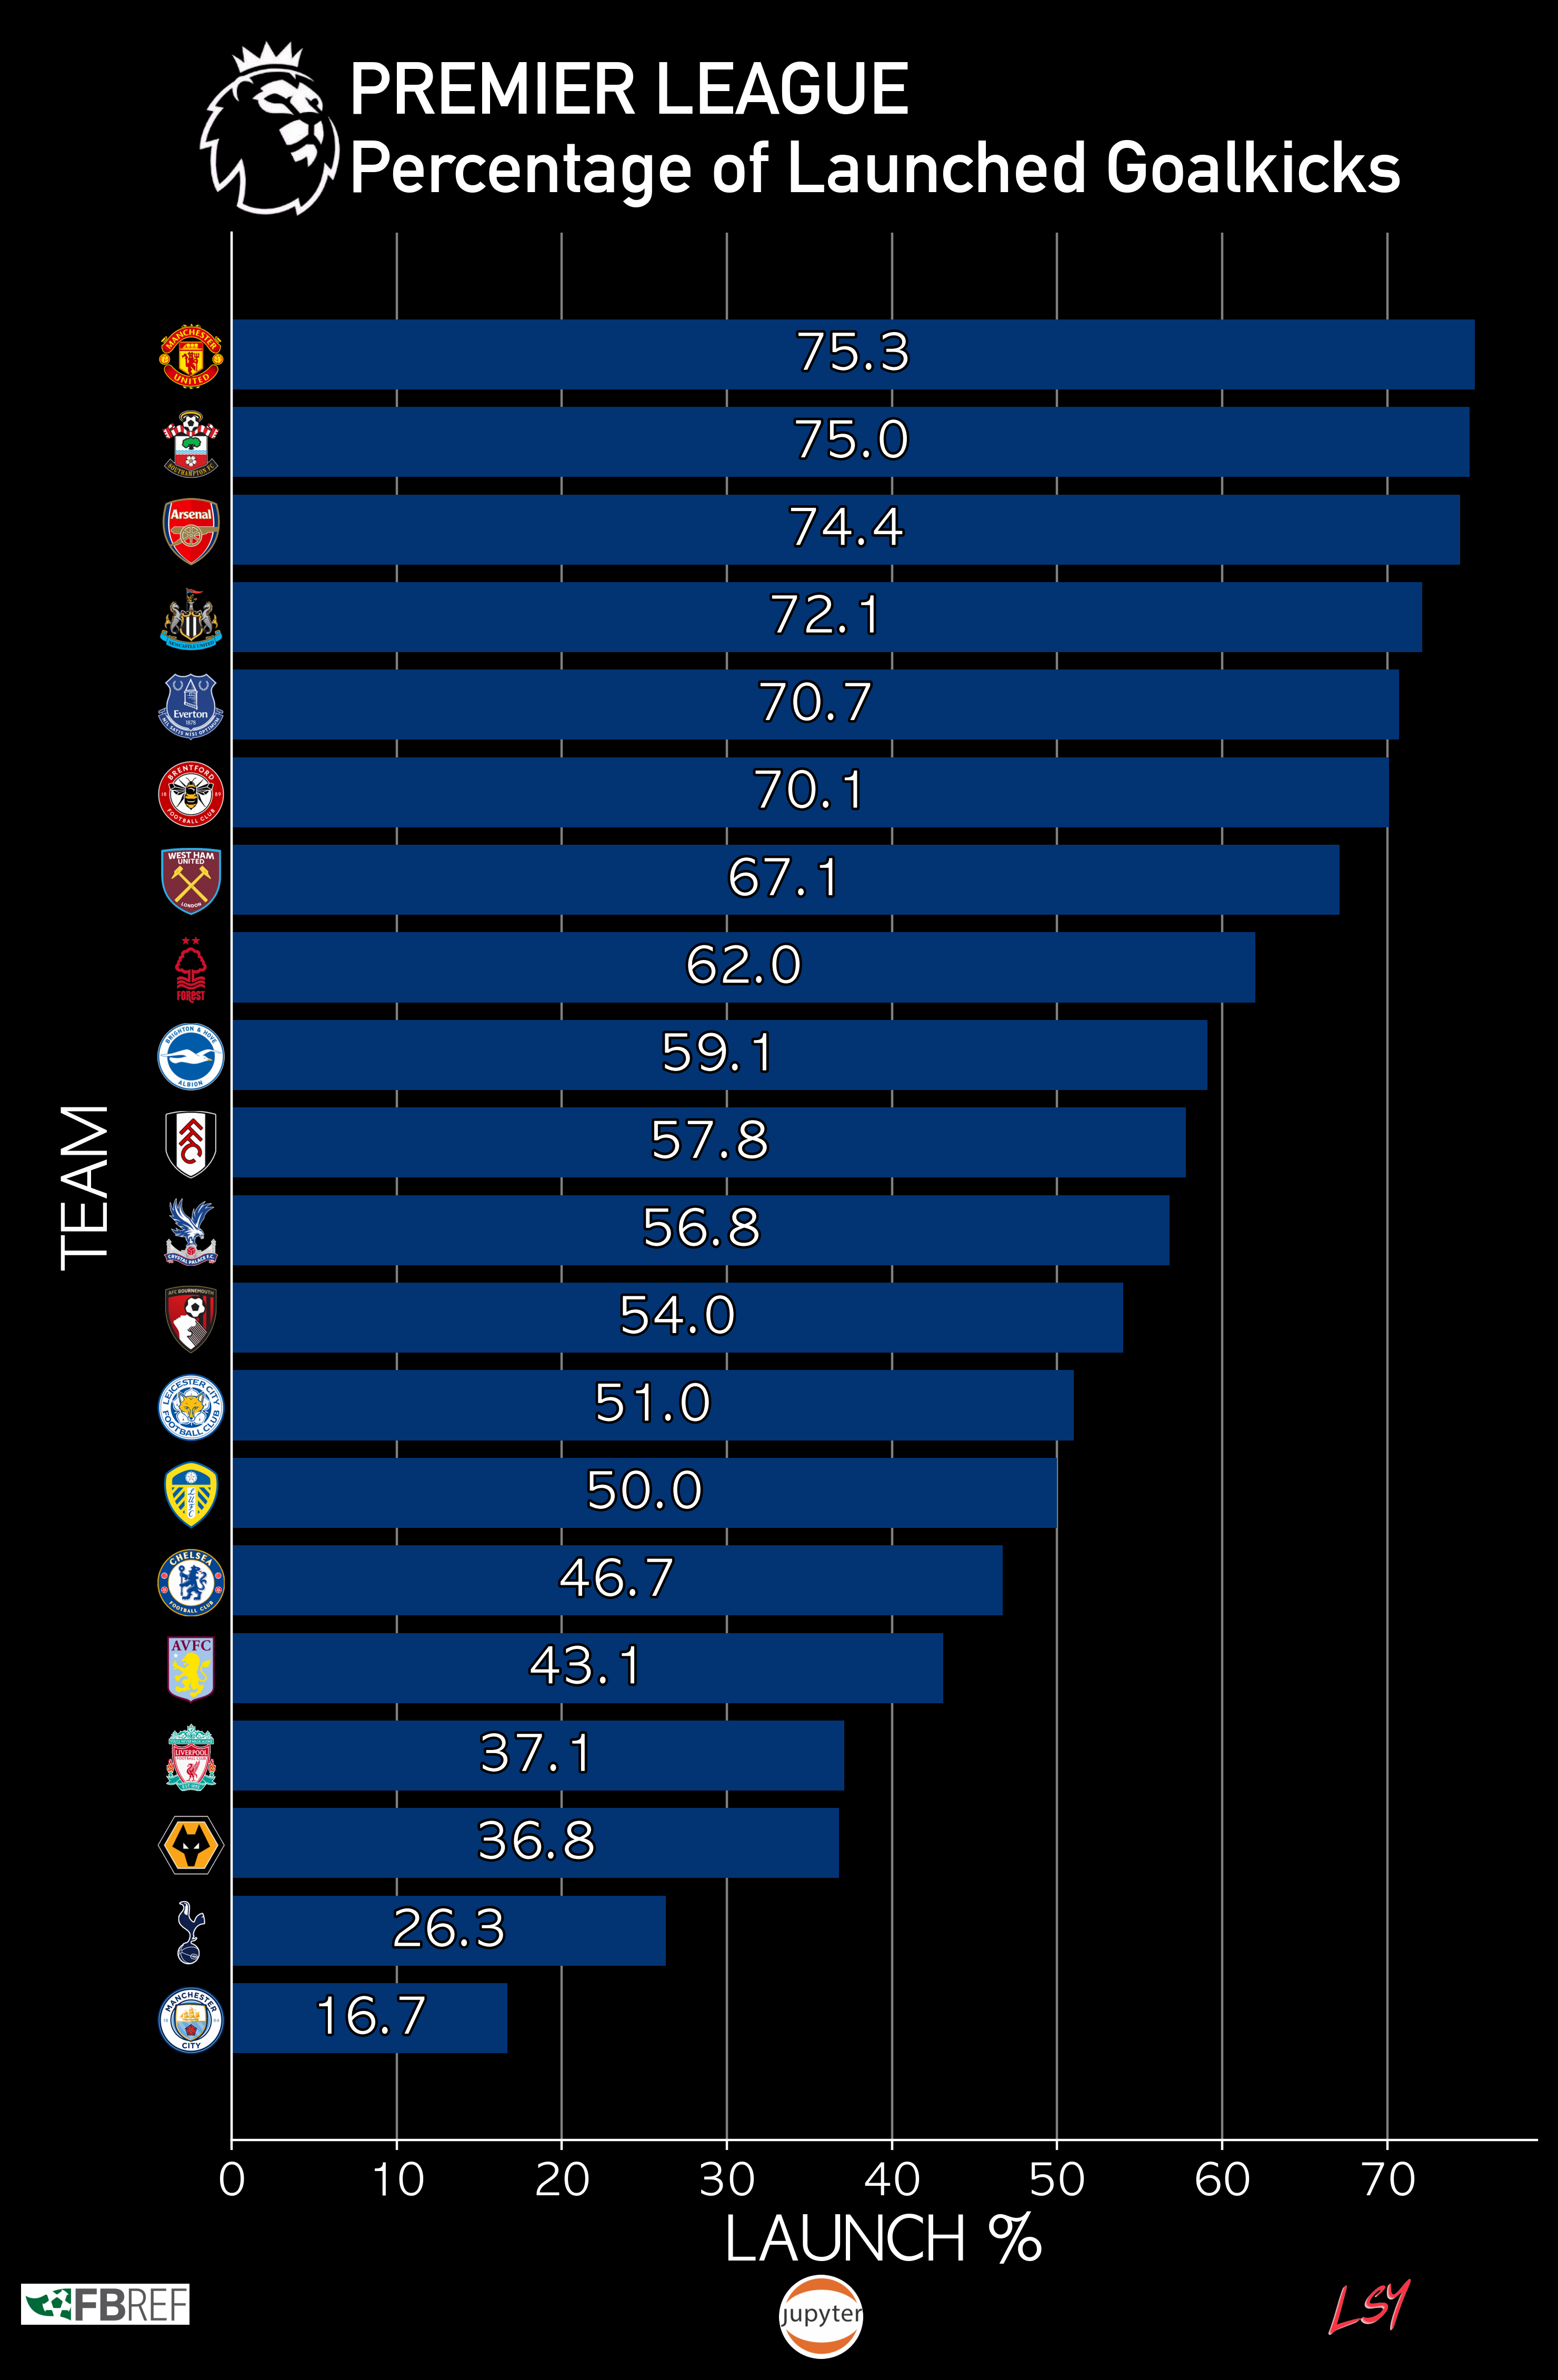

In [184]:
fig = plt.figure(figsize=(8, 12), dpi = 400)
ax = plt.subplot()

fig.set_facecolor('black')
ax.patch.set_facecolor('black')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='black')




# Add spines
ax.spines["left"].set_color('white')   #spines removes the plot edges(border)
ax.spines["bottom"].set_color('white')
ax.spines["right"].set_color('white')   #spines removes the plot edges(border)
ax.spines["top"].set_color('white')


plt.ylabel("TEAM",font ='AppleGothic',fontsize = 20,color="white")
plt.xlabel("LAUNCH %",font ='AppleGothic',fontsize = 20,color="white")
ax.tick_params(labelsize=14)

plt.xticks(fontname = "AppleGothic",color="white")
ax.yaxis.set_ticklabels([x for x in range(100,120)])

# Add spines
ax.spines["top"].set(visible = False)   #spines removes the plot edges(border)
ax.spines["right"].set(visible = False)

ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='-')
ax.barh(liga["Squad"],liga["Launch%"],color="#023474")

# Adjust ticks
ax.tick_params(axis = "x", rotation = 0)
ax.tick_params(labelsize=15)

# Adding prem logo
logo_ax =fig.add_axes(
        [0.075,0.845,0.15,0.15],
         fc='None'
 )
logo_ax.imshow(im1)
logo_ax.axis('off')



#Add percentage
aux_counter = 0
index =0
for y in (liga["Launch%"]):

    away_text = ax.annotate(
        xy = (y/2,aux_counter), # Notice the sum of the bottom data.
        text = f"{y}",
        size = 17,
        ha = "center",
        va = "center",
        weight = "bold",
        rotation = 0,fontname = "AppleGothic",color="white"
    )
    
    away_text.set_path_effects(
        [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
    )

    aux_counter += 1

fig_text(
	x = 0.82, y = .89, 
    s = "PREMIER LEAGUE \nPercentage of Launched Goalkicks",
	va = "bottom", ha = "right",
	font = "DIN Alternate",size =25,color="white",fontweight="bold"
)


# Add team logos
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for y in liga.index:
    ax_coords = DC_to_NFC((-4.5,y-0.6))
    team_id = liga['code'].iloc[y]
    team_name = liga['Squad'].iloc[y].replace(' ', '\n')
    ax_size = 0.04
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None', anchor='C'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    player_face = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id}.png"))
    image_ax.imshow(player_face)
    image_ax.axis("off")
    ax.annotate(
        xy=(-.95, y - .32),
        text=team_name,
        size=4,
        ha='center',
        va='center'
    )
    
    
# Adding other logos
im2 = plt.imread('/Users/ligandrosy/Downloads/FB.png')
logo_ax =fig.add_axes(
        [0,0.01,0.1,0.1],
         fc='None'
 )
logo_ax.imshow(im2)
logo_ax.axis('off')

im3 = plt.imread('/Users/ligandrosy/Downloads/JP.png')
logo_ax =fig.add_axes(
        [0.45,0.03,0.05,0.05],
         fc='None'
 )
logo_ax.imshow(im3)
logo_ax.axis('off')

im4 = plt.imread('/Users/ligandrosy/Downloads/LSY.png')
logo_ax =fig.add_axes(
        [0.75,0.01,0.1,0.1],
         fc='None'
 )
logo_ax.imshow(im4)
logo_ax.axis('off')

fig.savefig("AFC VS ARS.jpg")